# Module 7. Data Preprocessing and String Manipulation

In [ ]:
import pandas as pd
import numpy as np

#1. Preprocessing the Data
Discretization/Binning, Indicator Variables, and Outlier Detection

## 1.1. Binning

### 1.1.1 Using `pd.cut()`

Binning refers to the practice of dividing a set of continuous or discrete variables into a set of discrete bins or intervals. Each bin represents a range of values, and data points falling within that range are grouped together.

For example, you may want to separate users based on users age or students based on their performance in an exam.

To bin a set of continuous data in `pandas` you can use the `cut` method.

In below example, we are binnning set of ages into 4 groups with the following boundry values:

`18 to 25`, `26 to 35`, `36 to 60` and `61 and older`.

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

`pandas` returns a special `Categorical` object from `cut` function. In this object, categories are defined as shown in the output above:

`[(18, 25] < (25, 35] < (35, 60] < (60, 100]]`.

The output describes the bins that each of the element is in. You can treat it like a bin name for each element.

The interval system for cut is consistent with the mathematical notation. The meaning of the `(` and `]` syntax is illustrated in the following visual.

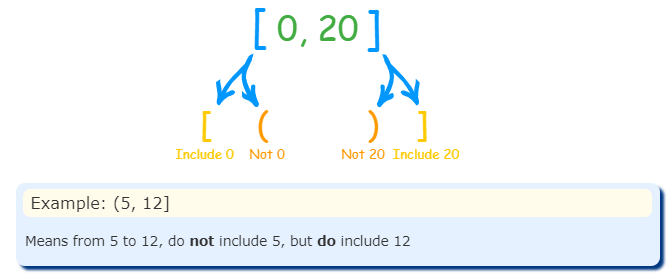

<sup>Retrieved from https://www.mathsisfun.com/sets/intervals.html</sup>

`categories` property returns the definition of the categories as `IntervalIndex` object:

In [ ]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

The `codes` property of the `cats` object contains an array specifying distinct category that each age item belongs to. 0 refers to the first category, 1 refers to the second category, and so on.

In [ ]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

`pd.value_counts(cats)` will get you the bin counts for the result of `pandas.cut`.

In [ ]:
pd.value_counts(cats)

/tmp/ipython-input-1485279302.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(cats)


,count
"(18, 25]",5
"(25, 35]",3
"(35, 60]",3
"(60, 100]",1


You can chooce which side is included by passing `right=False`.


In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64, left]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

You can also pass your own bin names by passing a list or array to the `labels` option:

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAges', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAges', 'MiddleAges', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAges' < 'Senior']

Instead of specifying specific intervals, we can just pass an integer to get equal length bins of the same number based on the max and min value of the data.

The `precision` parameter limits decimal precision in the values. `precision=2` limits decimal precision to 2 digits.

In [ ]:
data = np.random.rand(20)
data

array([0.83169249, 0.94357768, 0.72259914, 0.98560152, 0.74438335,
       0.13471959, 0.31084333, 0.52685495, 0.15860886, 0.60036172,
       0.24114342, 0.8351691 , 0.35396613, 0.12275679, 0.43076318,
       0.67154846, 0.28653093, 0.24000843, 0.80439577, 0.0343624 ])

In [ ]:
cats = pd.cut(data, 4, precision=2)
cats

[(0.75, 0.99], (0.75, 0.99], (0.51, 0.75], (0.75, 0.99], (0.51, 0.75], ..., (0.51, 0.75], (0.27, 0.51], (0.033, 0.27], (0.75, 0.99], (0.033, 0.27]]
Length: 20
Categories (4, interval[float64, right]): [(0.033, 0.27] < (0.27, 0.51] < (0.51, 0.75] <
                                           (0.75, 0.99]]

<h3 style="color:#cccc;">In-class Exercise</h3>

In [ ]:
#load: student-visits.xlsx

#preprocessing: DROP na VALUES FROM 'StudentId', 'CourseDay' WITH OPTION how='any'
#preprocessing: DROP duplicates keep the last'

studentVisits = pd.read_excel("student-visits.xlsx")

studentVisits = studentVisits.dropna(
    subset=["StudentId", "CourseDay"],
    how="any"
)

studentVisits = studentVisits.drop_duplicates(keep="last")
studentVisits.head(5)

,StudentId,CourseDay,Modules
1,19,43.0,6.0
2,19,12.0,3.0
3,12,12.0,5.0
4,18,2.0,4.0
5,10,41.0,6.0


We have students' grade data in the following dictionary. Based on this data, we want to add the grade column to student visits dataframe.

In [ ]:
studentIdToGrade = {
   1: 40, 2: 30, 3: 80, 4: 60, 5: 40, 6: 90,7: 70,
   8: 20,9: 90, 10: 90,11: 80, 12: 60, 13: 90, 14: 20,15: 70,
   16: 60, 17: 85, 18: 60,19: 85, 20: 75}

In [ ]:
# your code goes here
studentVisits["Grade"] = studentVisits["StudentId"].map(studentIdToGrade)

Now, we want to group students based on their performance level into the following bins: **[0, 60, 80, 100]**.

We will first obtain a dataframe from `studentVisits` which only contains `StudentId` and `Grade` information.

In [ ]:
studentGrades = studentVisits.drop_duplicates(subset=["StudentId"])[['StudentId', 'Grade']]
studentGrades.head(5)

,StudentId,Grade
1,19,85
3,12,60
4,18,60
5,10,90
6,11,80


Now, let's create the bins with proper grade letters.

In [ ]:
bins = [0, 60, 70, 80, 90, 100]
group_names = ['F', 'D', 'C', 'B', 'A']
cats = pd.cut(studentGrades.Grade, bins, labels=group_names, right=False)
cats

1     B
3     D
4     D
5     A
6     B
11    F
12    A
13    B
14    D
15    D
16    A
17    C
18    A
24    C
35    F
39    F
40    F
48    C
65    B
91    F
Name: Grade, dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [ ]:
studentGrades['LetterGrade'] =  cats
studentGrades.head(4)

,StudentId,Grade,LetterGrade
1,19,85,B
3,12,60,D
4,18,60,D
5,10,90,A


### 1.1.2 Using `pd.qcut()`

There's another tool called qcut that's similar to cut. The main difference is how they decide the size of each bin.

With `cut`, the bins are created in a way that makes sense based on the actual values of your data.

However, this might result in some bins having more data points than others. It's like trying to group students by height without making sure each group has the same number of students.

Here's where the term "**quantile**" comes in. A quantile is a way to divide your data into equal parts. It's like saying, "Let's cut our scores into four equal pieces." Each piece is a quantile. So, when you use `qcut`, it looks at these quantiles, or equal parts, of your data and tries to create bins where each group has roughly the same number of scores.

In simple terms, if you want groups with similar numbers of things, like grades or students, `qcut` might be a better choice because it aims for more evenly sized bins based on the distribution of your data.

As `qcut` uses sample quantiles, you wil roughly obtain equal-size bins.

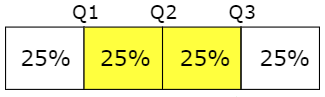

We can even pass our own quantiles to `qcut`.

In [ ]:
data = [16, 11, 12, 18, 17, 14, 10, 3, 4, 5, 4, 7]
cats = pd.qcut(data, 4)
cats

[(14.5, 18.0], (10.5, 14.5], (10.5, 14.5], (14.5, 18.0], (14.5, 18.0], ..., (2.999, 4.75], (2.999, 4.75], (4.75, 10.5], (2.999, 4.75], (4.75, 10.5]]
Length: 12
Categories (4, interval[float64, right]): [(2.999, 4.75] < (4.75, 10.5] < (10.5, 14.5] <
                                           (14.5, 18.0]]

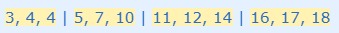

In [ ]:
pd.value_counts(cats)

(2.999, 4.75]    3
(4.75, 10.5]     3
(10.5, 14.5]     3
(14.5, 18.0]     3
dtype: int64

If you want to learn more about `cut` and `qcut` functions, you can read the following resources: https://pbpython.com/pandas-qcut-cut.html

<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

Imagine that the course instructors wants to distribute students into 4 achievement levels. This way, it would become possible to see who are the students in the top group (**Q4**) or the bottom group (**Q1**), and even check the students in the middle (**Q2-Q3**), regardless of their grade leters.

Therefore, in this case, we need to divide students into 4 equal quartile based on their performance using `pd.qcut`.

In [ ]:
quartiles = pd.qcut(studentGrades["Grade"], 4)   # 4 equal-sized groups
quartiles

,Grade
1,"(70.0, 85.0]"
3,"(55.0, 70.0]"
4,"(55.0, 70.0]"
5,"(85.0, 90.0]"
6,"(70.0, 85.0]"
11,"(19.999, 55.0]"
12,"(85.0, 90.0]"
13,"(70.0, 85.0]"
14,"(55.0, 70.0]"
15,"(55.0, 70.0]"


In [ ]:
quartiles.value_counts()

,count
Grade,
"(55.0, 70.0]",6
"(19.999, 55.0]",5
"(70.0, 85.0]",5
"(85.0, 90.0]",4


## 1.2. Computing Indicators [Dummy Variables]

A categorical variable represents different categories or groups, which we have created using qcut or cut in the previous examples.

Dummy variables provide a binary representation of these categories. Essentially, dummy variables serve as indicators, highlighting whether an observation belongs to a specific category or not.

In data analysis and machine learning, the conversion of categorical variables into dummy variables is a powerful technique, which we may cover in the last week.

If a column has 3 distinct values, we can derive 3 distinct dummy variables (as columns in a DataFrame), all containing 1s and 0s.

Original data:

    Plant   Types              
    1       TypeA
    2       TypeB
    3       TypeC

Dummy variables generated from the original data:

    Plant TypeA TypeB TypeC              
    1     1     0     0
    2     0     1     0
    3     0     0     1

pandas has the `get_dummies` function to produce dummy variables.

Let's work on an example to understand how this function works:

In [ ]:
df = pd.DataFrame({'level': ['b', 'b', 'a', 'c', 'a', 'b']}, index=range(1, 7))
df.index.name = "students"
df

,level
students,
1,b
2,b
3,a
4,c
5,a
6,b


Now let's generage the dummy variables as columns:

In [ ]:
pd.get_dummies(df['level'])

,a,b,c
students,,,
1,False,True,False
2,False,True,False
3,True,False,False
4,False,False,True
5,True,False,False
6,False,True,False


In some cases, you may want to add a prefix to make the column names more explanatory (column names are actually the names of the dummy variables).

`get_dummies` has a `prefix` argument for doing this:

In [ ]:
dummies = pd.get_dummies(df['level'], prefix='level')
dummies

,level_a,level_b,level_c
students,,,
1,False,True,False
2,False,True,False
3,True,False,False
4,False,False,True
5,True,False,False
6,False,True,False


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

Let's create a dummy variable indicating if a student visited a specific module or not.

In [ ]:
module_dummies = pd.get_dummies(studentVisits["Modules"], prefix="Module")
module_dummies.head()

,Module_1.0,Module_2.0,Module_3.0,Module_4.0,Module_5.0,Module_6.0
1,False,False,False,False,False,True
2,False,False,True,False,False,False
3,False,False,False,False,True,False
4,False,False,False,True,False,False
5,False,False,False,False,False,True


Let's join two dataframes:

In [ ]:
studentVisits_withModules = studentVisits.join(module_dummies)
studentVisits_withModules

,StudentId,CourseDay,Modules,Grade,Module_1.0,Module_2.0,Module_3.0,Module_4.0,Module_5.0,Module_6.0
1,19,43.0,6.0,85,False,False,False,False,False,True
2,19,12.0,3.0,85,False,False,True,False,False,False
3,12,12.0,5.0,60,False,False,False,False,True,False
4,18,2.0,4.0,60,False,False,False,True,False,False
5,10,41.0,6.0,90,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
995,10,40.0,5.0,90,False,False,False,False,True,False
996,20,27.0,4.0,75,False,False,False,True,False,False
997,10,44.0,5.0,90,False,False,False,False,True,False
998,10,11.0,6.0,90,False,False,False,False,False,True


### 1.2.1. Dummy varibles with `cut` or `qcut`

Another useful method in statistical applications is to combine the dummy function with discretization function like `cut`. This shows if a value is present in a bin or not.

For below example we will use random seed to make the example more deterministic.

In [ ]:
np.random.seed(12345)
values = np.random.rand(10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [ ]:
bins = [0, 0.5, 1]
cats = pd.cut(values, bins)
cats

[(0.5, 1.0], (0.0, 0.5], (0.0, 0.5], (0.0, 0.5], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0], (0.5, 1.0]]
Categories (2, interval[float64, right]): [(0.0, 0.5] < (0.5, 1.0]]

In [ ]:
pd.get_dummies(cats)

,"(0.0, 0.5]","(0.5, 1.0]"
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


<h3 style="color:#cccc;">In-class Exercise [Cont'd]</h3>

For the `studentGrades`, we want to add a column to indicate pass status of students. Scores lower than are considered `Fail` and the rest is considered `Success`.

First, let's create these categories using `cut`/`qcut`:

In [ ]:
status_bins = [0, 60, 100]
status_labels = ["Fail", "Success"]

studentGrades["Status"] = pd.cut(
    studentGrades["Grade"],
    bins=status_bins,
    labels=status_labels,
    right=False
)

studentGrades.head()

,StudentId,Grade,Status
1,19,85,Success
3,12,60,Success
4,18,60,Success
5,10,90,Success
6,11,80,Success


Then, let's generage dummy variables from the `status`:


In [ ]:
status_dummies = pd.get_dummies(studentGrades["Status"])
status_dummies.head()

,Fail,Success
1,False,True
3,False,True
4,False,True
5,False,True
6,False,True


`.join` two dataframes:

In [ ]:
studentGrades = pd.concat([studentGrades, status_dummies], axis=1)
studentGrades.head()

,StudentId,Grade,Status,Fail,Success
1,19,85,Success,False,True
3,12,60,Success,False,True
4,18,60,Success,False,True
5,10,90,Success,False,True
6,11,80,Success,False,True


## 1.3. Detecting and Filtering Outliers

"**Outliers**" are values that "*lie outside*" the other values.

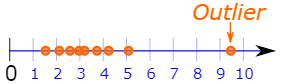

<sub>Retrieved from https://www.mathsisfun.com/data/outliers.html</sub>

> Example: Someone like Elon Musk who has a net worth in the billions of dollars would be considered an outlier in terms of annual income.

Outliers affect the **mean**, but not so much the *median* or *mode*.

Consider a DataFrame with some normally distributed data (noted by its mean close to 0):

In [ ]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025619,-0.002790,-0.069612,0.065019
std,1.006798,0.996797,0.996400,0.991650
min,-3.184377,-3.745356,-3.428254,-3.548824
25%,-0.641675,-0.644144,-0.774890,-0.596286
50%,0.002073,-0.014664,-0.117489,0.094503
75%,0.680391,0.654328,0.611729,0.777558
max,3.260383,3.927528,3.366626,2.653656


Suppose you wanted to find values in one of the columns exceeding 3 in absolute value:

In [ ]:
col = data[2]
col[np.abs(col) > 3]

520   -3.428254
897    3.366626
Name: 2, dtype: float64

To select all rows having a value exceeding 3, you can use the `any` method on a `boolean` DataFrame:

In [ ]:
np.abs(data) > 3

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,True,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [ ]:
(np.abs(data) > 3).any(axis=1)

0      False
1      False
2      False
3       True
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
3,3.248944,-1.021228,-0.577087,0.124121
95,0.106061,3.927528,-0.255126,0.854137
100,3.176873,0.959533,-0.975340,-1.116742
303,-0.025907,-3.399312,-0.974657,-0.685312
322,3.260383,0.963301,1.201206,-1.852001
398,-0.196713,-3.745356,-1.520113,-0.346839
497,-3.056990,1.918403,-0.578828,1.847446
520,0.326045,0.425384,-3.428254,-0.296336
584,-3.184377,1.369891,-1.074833,-0.089937
805,0.208011,-0.150923,-0.362528,-3.548824


# 2. String Manipulation

Python is a popular raw data manipulation language due to its ease of use for string and text processing.

Simple text operations can be done using `String` object's built-in methods.

For more complex pattern matching and text manipulations, we can use regular expressions.

`pandas` enable us to apply both `string` and `regex` functions on whole arrays of data.

## 3.1. String Object Methods
In most string manipulation scenarios, inbuilt string methods are mostly sufficient.

As an example, a string can be broken based on a seperator using `split`.

In [ ]:
val = 'a,b,   guido'

val.split(',')

['a', 'b', '   guido']

It is often combined with `strip` to trim out whitespace, including line breaks.

In [ ]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

Substrings can be concatenated together using the `+` operator.

However, a more faster and pythonic way to do so is to pass a list or tuple of substrings to the `join` method on the string.

In [ ]:
#Not recommended
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [ ]:
'::'.join(pieces)

'a::b::guido'

Often you need to search through the string data for example finding the names that contain a specific sub-string.

The `in` keyword is the best way to detect substring. Although, `index` and `find` can also be used.

In [ ]:
'guido' in val

True


There is a major difference between `find` and `index`. `index` returns an Exception if substring is not found. `find` returns `-1`.

In [ ]:
val.index(',')

1

In [ ]:
val.find(':')

-1

In [ ]:
# val.index(':')


`count` returns number of occurences of a particular substring.

In [ ]:
val.count(',')

2


`replace` substitutes occurence of one pattern for another. It is commonly used to delete patterns by passing an empty string as replacement.

In [ ]:
val.replace(',', '::')

'a::b::   guido'

In [ ]:
val.replace(',', '')

'ab   guido'

There are many more built-in String methods in python. They are listed below:

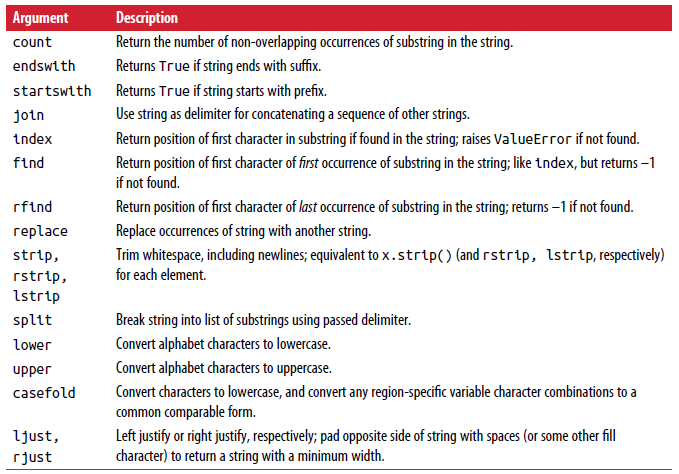

## 3.2. Regular Expression

In this lecture, we will delve into the concept of matching patterns in strings through the use of regular expressions. Regular expressions, often abbreviated as `regexes`, are constructed in a concise formatting language. Broadly speaking, a regular expression can be conceptualized as a predefined pattern provided to a regex processor along with source data. Subsequently, the processor analyzes the source data using this pattern and yields segments of text, which can be further handled by a data scientist or programmer.

The primary motivations behind employing regular expressions include
* checking for the presence of a specific pattern in source data,
  * Imagine you have a long text document, and you want to know if there is an email address anywhere in it.

* getting all instances of a complex pattern from some source data,
  * Suppose you have a list of email addresses, and you want to extract all the email domains (the part after the "@" symbol).

* refining the source data by employing a pattern
  * Consider a dataset with messy phone numbers that are inconsistently formatted. You might use a pattern to extract only the numerical digits and create a standardized format for all phone numbers.

While regular expressions may appear complicated, they represent a fundamental technique for data cleansing in the realm of data science applications. A proficient understanding of regexes equips individuals to efficiently and promptly manipulate textual data for subsequent applications in data science.

In this lecture, I aim to provide you with a fundamental grasp of regex. With this foundation, you'll be equipped to decipher regex patterns used by others and enhance your ability to clean data effectively.

**Regular expressions is a large topic and we will cover some examples here.**

First we'll import the re module, which is where python stores regular expression libraries.

In [ ]:
import re

### 3.2.1. `match()` and `search()`

There are several main processing functions in `re` that you might use. The first, `match()` checks for a match that is at the beginning of the string and returns a boolean. Similarly, `search()`, checks for a match anywhere in the string, and returns a boolean.

In [ ]:
# Lets create some text for an example
text = "This is a good day."

# Now, lets check if the sentence start with...
if re.match("This", text):# the first parameter here is the pattern
  print('Starts with this.')

# Now, lets see if it's a good day or not:
if re.search("good", text): # the first parameter here is the pattern
    print("Wonderful!")
else:
    print("Alas :(")

Starts with this.
Wonderful!


### 3.2.2. `split()` and `findall()`

Besides looking for conditions, `regex` can break a string into smaller parts, a process known as **tokenizing**. This means dividing the string into pieces based on certain patterns. Tokenizing is important in natural language processing.

The `findall()` and `split()` functions will parse the string for us and return chunks. Lets try and example:


In [ ]:
text = "Amy works diligently. Amy gets good grades. Our student Amy is succesful."

# This is a bit of a fabricated example, but lets split this on all instances of Amy
re.split("Amy", text)

['',
 ' works diligently. ',
 ' gets good grades. Our student ',
 ' is succesful.']

Let’s look at a better yet simple example. Suppose we wanted to split a string with a variable number of whitespace characters (tabs, spaces, and newlines).

The regex describing one or more whitespace characters is `\s+`:

In [ ]:
import re

text = "foo bar\t baz   \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

If we wanted to count how many times we have talked about Amy, we could use `findall()`

In [ ]:
re.findall("Amy", text)

['Amy', 'Amy', 'Amy']

Previous one is a very simple example and cannot show the power of `findall()`. Let's consider a more practical example where we use regular expressions to find mentions of "Amy" in a specific context and extract additional information around each mention.

For this example, let's look for sentences where "Amy" is mentioned and extract the verbs that follow her name:

In [ ]:
# Define a pattern to match sentences mentioning "Amy" and capturing the following verb
pattern = r"Amy (\w+)"#try it without paranthesis as well
#The regular expression r"Amy (\w+)" looks for the pattern "Amy" followed by a space and
#then captures the following word (assumed to be a verb here)

# Use re.findall to find all matches
matches = re.findall(pattern, text)

print(matches)
# Display the result
for verb in matches:
    print(f"Amy {verb}")

['works', 'gets']
Amy works
Amy gets


Now that we understand how the Python regex API works, let's delve into more complicated patterns. In the regex specification standard, there's a markup language to express patterns in text. We'll begin by discussing anchors.

Anchors determine the start and/or end of the string you're trying to match. The caret symbol (`^`) signifies the start, and the dollar sign symbol (`$`) indicates the end. Placing `^` before a string means the text must begin with the specified string. Similarly, putting `$` after a string means the text must end with the specified string.

In [ ]:
text = "Amy works diligently. Amy gets good grades. Our student Amy is successful."

# Check if the text begins with "Amy"
if re.search("^Amy", text):
    print("The text begins with 'Amy'")
else:
    print("The text does not begin with 'Amy'")


The text begins with 'Amy'


### 3.2.3. More about Patterns and Characters

Let's talk more about patterns and start with character classes. Let's create a string of a single learners' grades over a semester in one course across all of their assignments

In [ ]:
grades="ACAAAABCBCBAA"

If we want to answer the question "How many B's were in the grade list?" we would just use:

In [ ]:
re.findall("B",grades)

['B', 'B', 'B']

If we wanted to count the number of A's or B's in the list, we can't use "AB" since this is used to match all A's followed immediately by a B. Instead, we put the characters A and B inside square brackets.

In [ ]:
re.findall("[AB]",grades)

['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A']

You can also include a range of characters, which are ordered
alphanumerically. For instance, if we want to refer to all lower case letters we could use [a-z].

Lets build a simple regex to parse out all instances where this student receive an A followed by a B or a C

In [ ]:
re.findall("[A][B-C]",grades)

['AC', 'AB']

Notice how the [AB] pattern describes a set of possible characters which could be either (A OR B), while the [A][B-C] pattern denoted two sets of characters which must have been matched back to back. You can write  this pattern by using the pipe operator `|`, which means OR

In [ ]:
re.findall("AB|AC",grades)

['AC', 'AB']

We can use the caret with the set operator to negate our results. For instance, if we want to parse out only:

In [ ]:
# the grades which were not A's
re.findall("[^A]",grades)

['C', 'B', 'C', 'B', 'C', 'B']

### 3.2.4. Quantifiers

Quantifiers in regular expressions determine how many times a pattern should be matched for a successful match. The simplest quantifier is written as `e{m,n}`, where `e` is the character or expression being matched, `m` is the minimum number of times it must appear, and `n` is the maximum number of times it can appear.

Let's use these grades as an example. How many times has this student been on a back-to-back A's streak?

In [ ]:
re.findall("A{2,10}",grades) # we'll use 2 as our min, but ten as our max

['AAAA', 'AA']

So, we see that there were two streaks, one where the student had four A's, and one where they had only two A's.

Using this, we could find a decreasing trend in a student's grades

In [ ]:
re.findall("A{1,10}B{1,10}C{1,10}",grades)

There are three other quantifiers that are used as shorthand: an asterisk (`*`) to match zero or more times, a question mark (`?`) to match zero or one time, and a plus sign (`+`) to match one or more times.

#### In-class Exercise

Lets look at a more complex example, and load some data scraped from wikipedia

In [ ]:
with open("ferpa.txt","r") as file:
    # we'll read that into a variable called wiki
    wiki=file.read()
wiki

'Overview[edit]\nFERPA gives parents access to their child\'s education records, an opportunity to seek to have the records amended, and some control over the disclosure of information from the records. With several exceptions, schools must have a student\'s consent prior to the disclosure of education records after that student is 18 years old. The law applies only to educational agencies and institutions that receive funds under a program administered by the U.S. Department of Education.\n\nOther regulations under this act, effective starting January 3, 2012, allow for greater disclosures of personal and directory student identifying information and regulate student IDs and e-mail addresses.[2] For example, schools may provide external companies with a student\'s personally identifiable information without the student\'s consent.[2]\n\nExamples of situations affected by FERPA include school employees divulging information to anyone other than the student about the student\'s grades o

Scanning through this document one of the things we notice is that the headers all have the words [edit] behind them, followed by a newline character. So if we wanted to get a list of all of the headers in this
article we could do so using `re.findall`:

In [ ]:
re.findall("[a-zA-Z]{1,100}\[edit\]",wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

First, we can use `\w` to match any letter, including digits and `_`, which is a more concise solution for the same task:

In [ ]:
re.findall("[\w]{1,100}\[edit\]",wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

There are three other quantifiers we can use which shorten up the curly brace syntax. We can use an
asterix `*` to match 0 or more times, so let's try that.

In [ ]:
re.findall("[\w]*\[edit\]",wiki)

['Overview[edit]', 'records[edit]', 'records[edit]']

We can add in a spaces using the space character:

In [ ]:
re.findall("[\w ]*\[edit\]", wiki)

['Overview[edit]',
 'Access to public records[edit]',
 'Student medical records[edit]']

Ok, so this gets us the list of section titles in the wikipedia page! You can now create a list of titles by
iterating through this and applying another regex:

In [ ]:
for title in re.findall("[\w ]*\[edit\]",wiki):
    # Now we will take that intermediate result and
    #split on the square bracket [ just taking the first result
    print(re.split("[\[]",title)[0])

Overview
Access to public records
Student medical records


### 3.2.5. Regex to filter a dataframe

In the previous example, we searched through a text. What if we have a dataframe and what to filter the dataframe based on some pattern match?

Assume that we have a DataFrame with a column `phoneNumber` containing phone numbers. Some values in this column has a valid format "+##-###-###-####" while others do not:

In [ ]:
import re
import pandas as pd
df = pd.DataFrame({'phoneNumber': ['+90-554-123-1445', '90-333-222-111',
                                   '+90-554-123-145', '+90-555-444-333',
                                   '9876543210', '+34-888-666-7777']})
df

,phoneNumber
0,+90-554-123-1445
1,90-333-222-111
2,+90-554-123-145
3,+90-555-444-333
4,9876543210
5,+34-888-666-7777


Let's firt write the regex pattern:

In [ ]:
pattern = r'^\+\d{2}-\d{3}-\d{3}-\d{4}'

1. `^`: Asserts the start of the string. This means that the pattern should match only if the phone number starts at the beginning of the string.

2. `\+`: Matches the plus sign +. The backslash \ is an escape character that indicates that the plus sign should be treated literally. The plus sign is a special character in regular expressions, so it needs to be escaped when you want to match it as a regular character.

3. `\d{2}`: Matches exactly two digits. \d is a shorthand character class that represents any digit (0-9), and {2} specifies that it should occur exactly two times.

4. `-`: Matches a hyphen.

5. `\d{3}`: Matches exactly three digits.

6. `\d{4}`: Matches exactly four digits.




Now that we have the pattern to match with the values in `phoneNumber` column, we have to figure out how to apply this to a dataframe.

So far, the methods we covered so far mostly work with finding patterns within a text (such as `findall()`). One good option to use here is `re.match` which returns if the provided string matches a patter:

In [ ]:
mask = df['phoneNumber'].apply(lambda x: bool(re.match(pattern, x)))
valid_phone_df = df[mask]
valid_phone_df

,phoneNumber
0,+90-554-123-1445
5,+34-888-666-7777


A better and simpler option is the `match` method that comes as an additional string method with `pandas`.

In [ ]:
mask = df['phoneNumber'].str.match(pattern)
valid_phone_df = df[mask]
valid_phone_df

,phoneNumber
0,+90-554-123-1445
5,+34-888-666-7777


There is much more to regular expressions in Python, most of which is outside the scope of this course.